In [329]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Exploring Data

In [330]:
df = pd.read_csv('data/FastagFraudDetection.csv')
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [331]:
#shape of data
df.shape

(5000, 13)

In [332]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [333]:
#check the null values
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [334]:
df[df['FastagID'].isnull()]

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
9,10,1/15/2023 7:30,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",72,KA22ST6789,Not Fraud
16,17,1/22/2023 16:45,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",62,KA20GH1345,Not Fraud
23,24,1/29/2023 3:05,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",77,KA77UV0123,Not Fraud
30,31,2/5/2023 13:20,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",57,KA92IJ5789,Not Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,4967,8/31/2023 6:08,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",47,AP34MN6789,Not Fraud
4973,4974,12/27/2023 19:04,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",84,AP01AB4567,Not Fraud
4980,4981,4/20/2023 6:01,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",74,AP78OP2345,Not Fraud
4987,4988,8/19/2023 18:57,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",90,AP45CD0123,Not Fraud


In [335]:
df.duplicated().sum()

np.int64(0)

In [336]:
#for numerical features
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [337]:
#describe or get the statistical description for numerical+categorical data
df.describe(include='object')

,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Geographical_Location,Vehicle_Plate_Number,Fraud_indicator
count,5000,5000,4451,5000,5000,5000,5000,5000,5000
unique,4423,7,4451,6,2,3,5,5000,2
top,1/24/2023 2:55,Bus,FTG-459-WSX-543,B-102,Regular,Large,"13.059816123454882, 77.77068662374292",KA37AB3456,Not Fraud
freq,5,716,1,1432,2858,2144,1000,1,4017


### Observation 1
1. Fastag ID has 549 null values
2. No Duplicate Entries
3. Data types are almost correct

In [338]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

In [339]:
print("Unique Vehicle Type: ",df['Vehicle_Type'].unique())
print("Unique TollBoothID: ",df['TollBoothID'].unique())
print("Unique Lane Type: ",df['Lane_Type'].unique())
print("Unique Vehicle Dimensions: ",df['Vehicle_Dimensions'].unique())
print("Unique Fraud Indicator: ",df['Fraud_indicator'].unique())
print("Unique Geographical Location: ",df['Geographical_Location'].unique())

Unique Vehicle Type:  ['Bus ' 'Car' 'Motorcycle' 'Truck' 'Van' 'Sedan' 'SUV']
Unique TollBoothID:  ['A-101' 'B-102' 'D-104' 'C-103' 'D-105' 'D-106']
Unique Lane Type:  ['Express' 'Regular']
Unique Vehicle Dimensions:  ['Large' 'Small' 'Medium']
Unique Fraud Indicator:  ['Fraud' 'Not Fraud']
Unique Geographical Location:  ['13.059816123454882, 77.77068662374292'
 '13.042660878688794, 77.47580097259879'
 '12.84197701525119, 77.67547528176169'
 '12.936687032945434, 77.53113977439017'
 '13.21331620748757, 77.55413526894684']


### 2. Data Visualisation

In [340]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [341]:
# percentage of fraud and not fraud
df['Fraud_indicator'].value_counts()

Fraud_indicator
Not Fraud    4017
Fraud         983
Name: count, dtype: int64

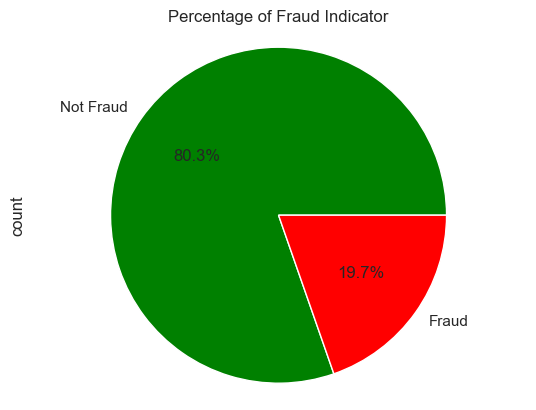

In [342]:
#Plot of fraud and not fraud
df['Fraud_indicator'].value_counts().plot(kind='pie',
                                         autopct='%1.1f%%',
                                         colors=['green','red'])
plt.title("Percentage of Fraud Indicator")
plt.axis('equal')
plt.show()

### 2.1 Analyse different columns
Analysis based on Fraud indicator

In [343]:
df['Vehicle_Type'].value_counts()

Vehicle_Type
Bus           716
Car           714
Motorcycle    714
Truck         714
Van           714
Sedan         714
SUV           714
Name: count, dtype: int64

Text(0.5, 1.0, 'Vehicle Type')

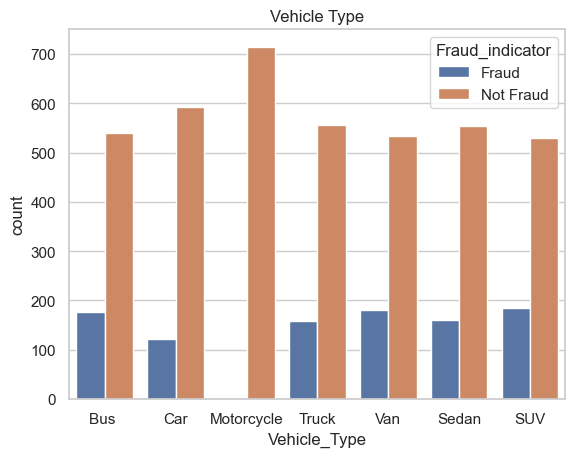

In [344]:
#Vehicle Types
sns.countplot(x = 'Vehicle_Type',
             data = df,
             hue = 'Fraud_indicator').set_title('Vehicle Type')

Text(0.5, 1.0, 'Vehicle Dimensions')

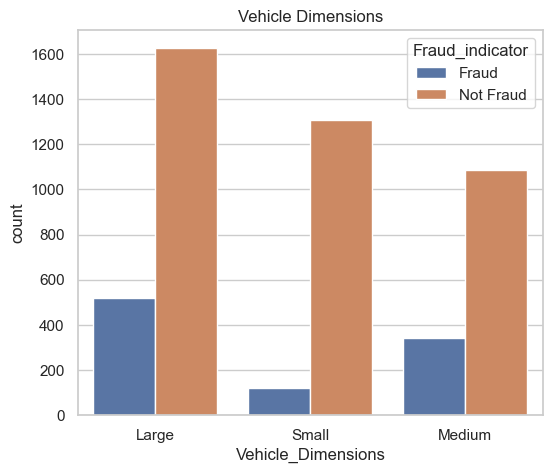

In [345]:
#Vehicle Dimension
plt.figure(figsize=(6,5))
sns.countplot(x = 'Vehicle_Dimensions',
             data = df,
             hue = 'Fraud_indicator').set_title('Vehicle Dimensions')

Text(0.5, 1.0, 'Different Toll Booths')

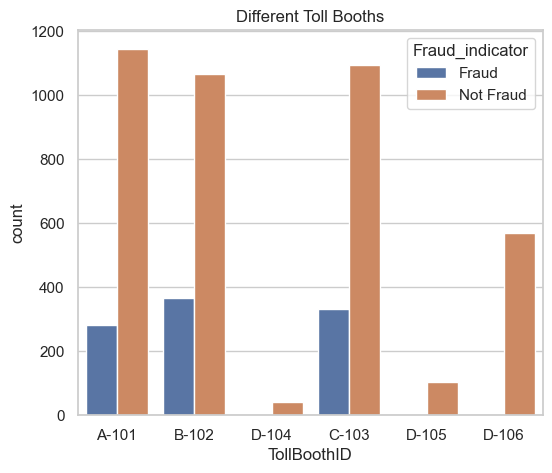

In [346]:
#Different toll booths
plt.figure(figsize=(6,5))
sns.countplot(x = 'TollBoothID',
             data = df,
             hue = 'Fraud_indicator').set_title('Different Toll Booths')

Text(0.5, 1.0, 'Different Lanes')

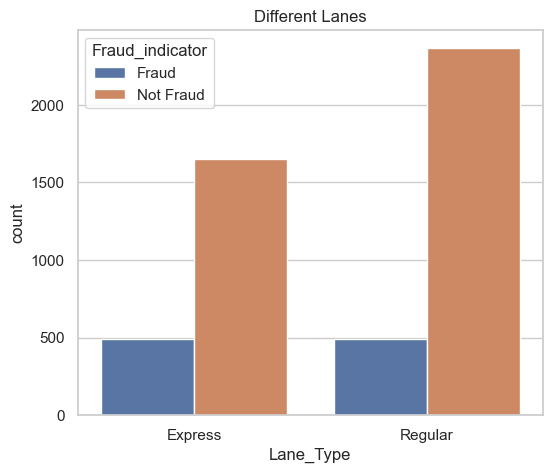

In [347]:
#Lane Type
plt.figure(figsize=(6,5))
sns.countplot(x = 'Lane_Type',
             data = df,
             hue = 'Fraud_indicator').set_title('Different Lanes')

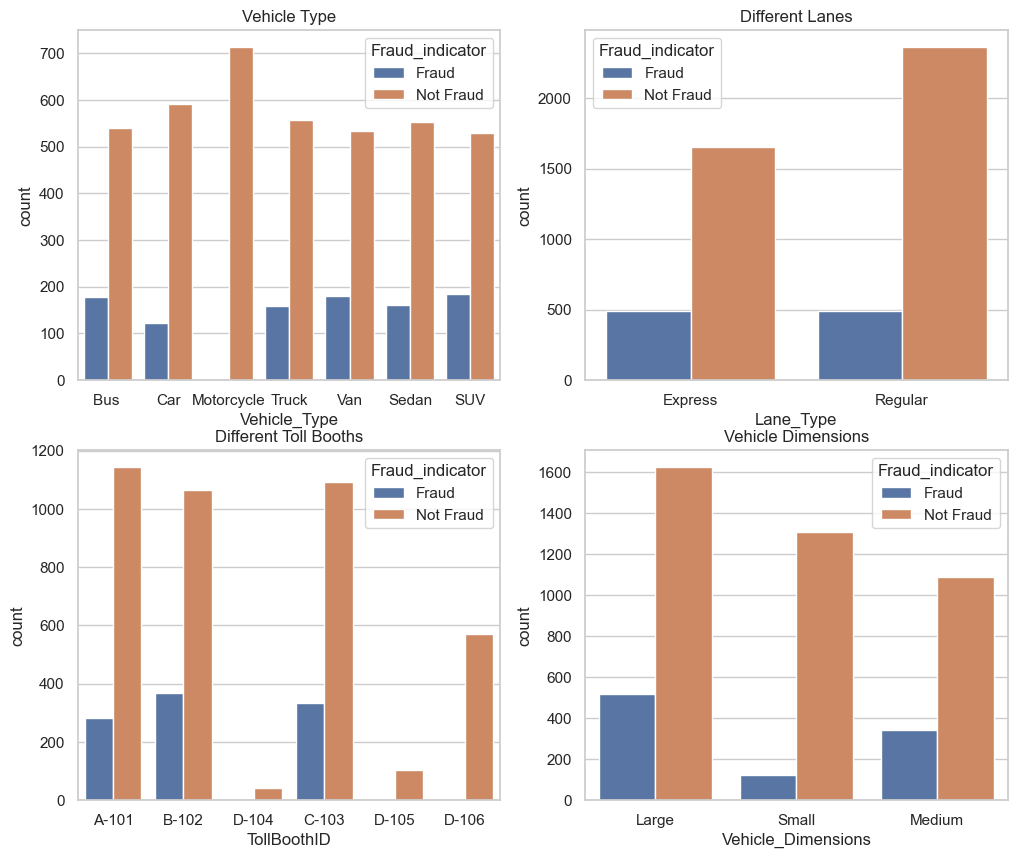

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

In [348]:
#Combining all graphs together
fig,axes = plt.subplots(2,2,figsize=(12,10))
#Vehicle Types
sns.countplot(x = 'Vehicle_Type',
             data = df,
             hue = 'Fraud_indicator',
             ax = axes[0,0]).set_title('Vehicle Type')
#Lane Type
plt.figure(figsize=(6,5))
sns.countplot(x = 'Lane_Type',
             data = df,
             hue = 'Fraud_indicator',
             ax = axes[0,1]).set_title('Different Lanes')
#Different toll booths
plt.figure(figsize=(6,5))
sns.countplot(x = 'TollBoothID',
             data = df,
             hue = 'Fraud_indicator',
             ax = axes[1,0]).set_title('Different Toll Booths')
#Vehicle Dimension
plt.figure(figsize=(6,5))
sns.countplot(x = 'Vehicle_Dimensions',
             data = df,
             hue = 'Fraud_indicator',
             ax = axes[1,1]).set_title('Vehicle Dimensions')

plt.tight_layout()

### Observation 2
1. Motorcycles are clean - not involved in any fraud
2. Tollbooths 104, 105 and 106 have no fraud detected. But 101,102,103 have mix data
3. Express way has higher fraud percentage based on vehicles than regular ways
4. very less small vehicles are involved in Faud

In [349]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

#### Distribution of Transaction Amount

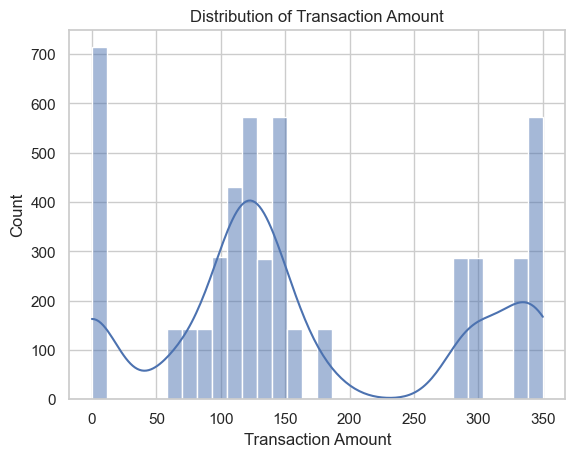

In [350]:
sns.histplot(df['Transaction_Amount'], bins=30, kde=True)
plt.title("Distribution of Transaction Amount")
plt.xlabel('Transaction Amount')
plt.ylabel("Count")
plt.show()

#### Distribution of Paid Amount

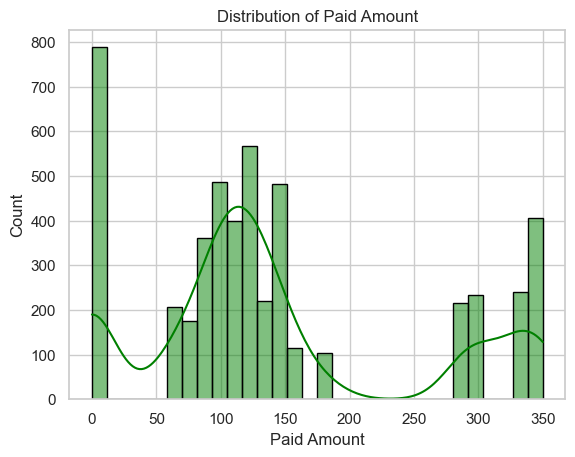

In [351]:
sns.histplot(df['Amount_paid'], bins=30, kde=True, color='green', edgecolor='black')
plt.title("Distribution of Paid Amount")
plt.xlabel('Paid Amount')
plt.ylabel("Count")
plt.show()

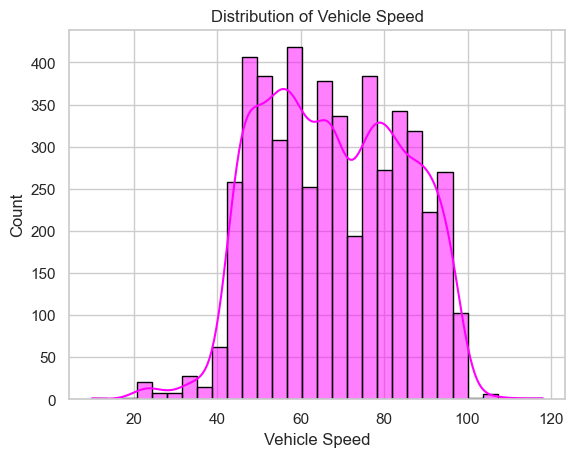

In [352]:
sns.histplot(df['Vehicle_Speed'], bins=30, kde=True, color='magenta', edgecolor='black')
plt.title("Distribution of Vehicle Speed")
plt.xlabel('Vehicle Speed')
plt.ylabel("Count")
plt.show()

### Relationship between transaction amount and paid amount

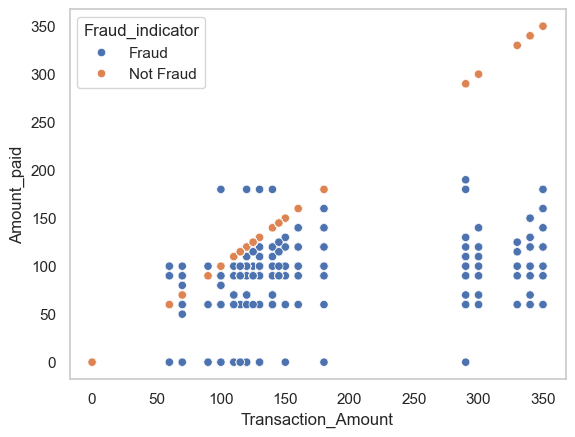

In [353]:
sns.scatterplot(x='Transaction_Amount',
                y='Amount_paid',
                hue='Fraud_indicator', data=df)
plt.grid()

### Observation 3
1. When transaction amount is not equal to amount paid => Fraud
2. When transaction amount is equal to amount paid => Not Fraud

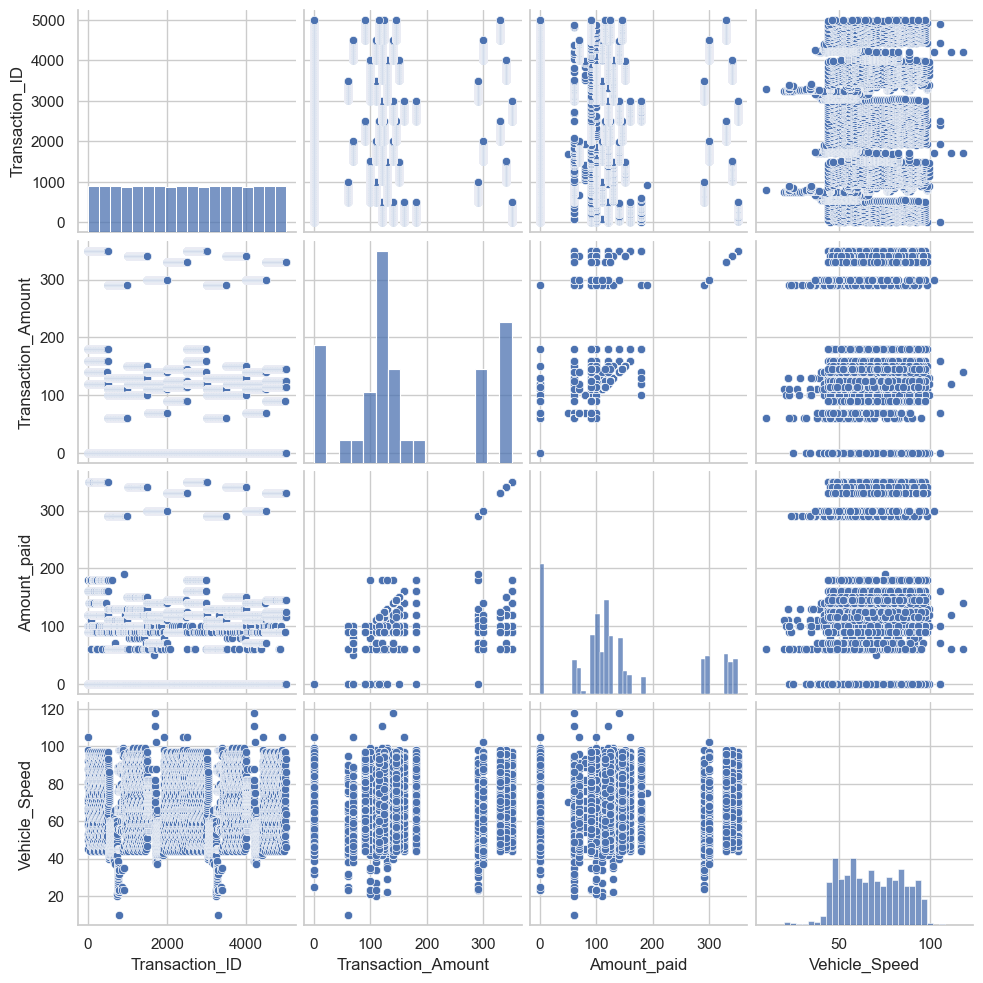

In [354]:
#Pair plot
sns.pairplot(df)

### 3. Feature Extraction

In [355]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [356]:
df['FastagID'].mode()[0]

'FTG-000-QAZ-210'

In [357]:
df['state_code'] = df['Vehicle_Plate_Number'].str[:2]
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,state_code
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,KA
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,KA
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud,KA
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud,KA
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud,KA


In [358]:
#remove vehicle number plate feature
df = df.drop('Vehicle_Plate_Number',axis=1)
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator,state_code
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud,KA
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud,KA
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud,KA
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud,KA
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud,KA


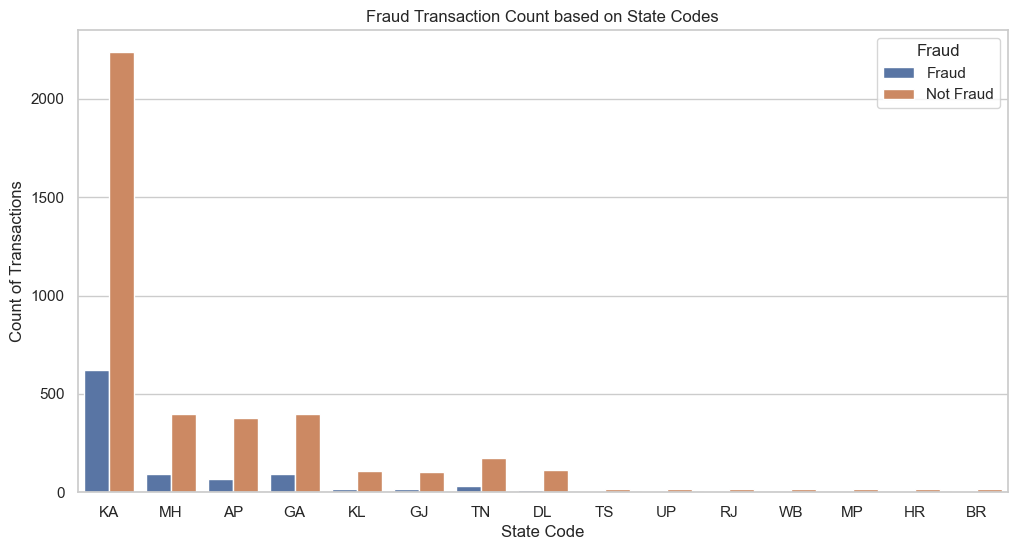

In [359]:
#visualize fraud based on states
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(x = 'state_code',
              data = df,
              hue = 'Fraud_indicator')
plt.title('Fraud Transaction Count based on State Codes')
plt.xlabel('State Code')
plt.ylabel('Count of Transactions')
plt.legend(title='Fraud')
plt.show()

In [360]:
df['state_code'].value_counts()

state_code
KA    2860
GA     489
MH     488
AP     447
TN     203
DL     123
KL     121
GJ     119
TS      22
UP      22
RJ      22
WB      21
MP      21
HR      21
BR      21
Name: count, dtype: int64

In [361]:
df.loc[df['Fraud_indicator']=='Fraud','state_code'].value_counts()

state_code
KA    623
GA     93
MH     92
AP     68
TN     31
GJ     16
KL     14
DL     12
TS      8
RJ      7
BR      6
HR      5
UP      4
WB      2
MP      2
Name: count, dtype: int64

### Observation 4
1. Highest fraud count is in Karnataka(KA)

In [362]:
#analyse timestamp to get the fraud/not fraud based on days
df['Timestamp']

0        1/6/2023 11:20
1        1/7/2023 14:55
2        1/8/2023 18:25
3         1/9/2023 2:05
4        1/10/2023 6:35
             ...       
4995     1/1/2023 22:18
4996    1/17/2023 13:43
4997      2/5/2023 5:08
4998    2/20/2023 20:34
4999     3/10/2023 0:59
Name: Timestamp, Length: 5000, dtype: object

In [363]:
#Convert timetamp into dataframe
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Transaction_ID         5000 non-null   int64         
 1   Timestamp              5000 non-null   datetime64[ns]
 2   Vehicle_Type           5000 non-null   object        
 3   FastagID               4451 non-null   object        
 4   TollBoothID            5000 non-null   object        
 5   Lane_Type              5000 non-null   object        
 6   Vehicle_Dimensions     5000 non-null   object        
 7   Transaction_Amount     5000 non-null   int64         
 8   Amount_paid            5000 non-null   int64         
 9   Geographical_Location  5000 non-null   object        
 10  Vehicle_Speed          5000 non-null   int64         
 11  Fraud_indicator        5000 non-null   object        
 12  state_code             5000 non-null   object        
dtypes: 

In [365]:
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Month'] = df['Timestamp'].dt.month

In [366]:
#drop time stamp feature
df = df.drop('Timestamp', axis=1)

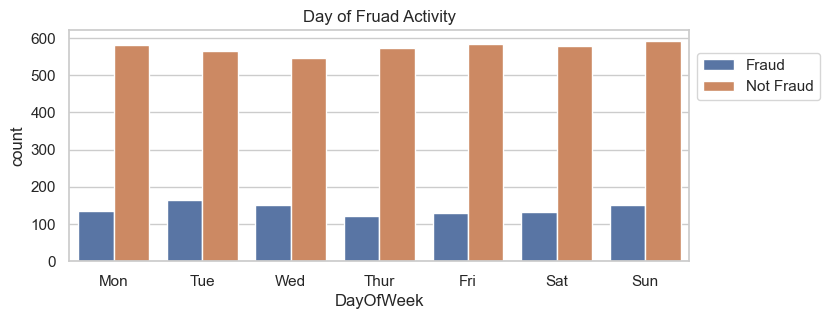

In [367]:
#visualise based on days
plt.figure(figsize=(8,3))
sns.countplot(data = df,
              x='DayOfWeek',
              hue='Fraud_indicator')
plt.title('Day of Fruad Activity')
plt.legend(loc='center left', bbox_to_anchor=(1,0.8))
plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tue', 'Wed', 'Thur','Fri','Sat','Sun'])
plt.show()

#### Correlation Matrix

In [368]:
numericalDf = df.select_dtypes('number') #only numerical data

In [369]:
corr_matrix = numericalDf.corr()
corr_matrix

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed,Hour,DayOfWeek,Month
Transaction_ID,1.000000,-0.023515,0.044433,0.014378,-0.023208,0.002446,0.260075
Transaction_Amount,-0.023515,1.000000,0.870078,0.053229,-0.036980,-0.001813,-0.019824
Amount_paid,0.044433,0.870078,1.000000,0.039027,-0.026358,-0.002960,0.018105
Vehicle_Speed,0.014378,0.053229,0.039027,1.000000,-0.002259,-0.017608,0.015349
Hour,-0.023208,-0.036980,-0.026358,-0.002259,1.000000,-0.010292,0.001041
DayOfWeek,0.002446,-0.001813,-0.002960,-0.017608,-0.010292,1.000000,0.002552
Month,0.260075,-0.019824,0.018105,0.015349,0.001041,0.002552,1.000000


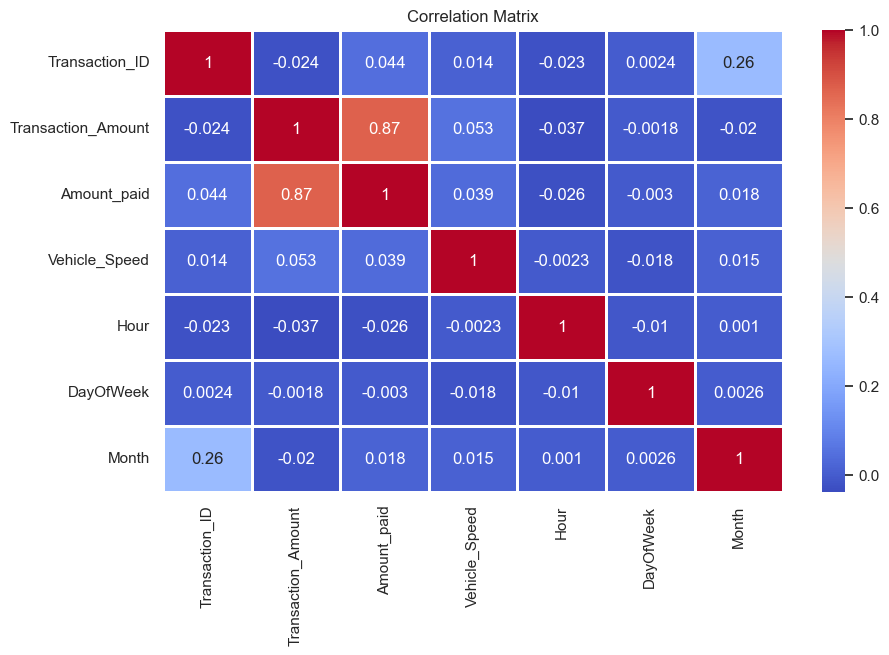

In [370]:
#Plot correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,
            cmap='coolwarm', annot=True, linewidths=2)
plt.title("Correlation Matrix")
plt.show()

In [371]:
df.columns

Index(['Transaction_ID', 'Vehicle_Type', 'FastagID', 'TollBoothID',
       'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount', 'Amount_paid',
       'Geographical_Location', 'Vehicle_Speed', 'Fraud_indicator',
       'state_code', 'Hour', 'DayOfWeek', 'Month'],
      dtype='object')

In [372]:
#Remove unecessary columns
df.drop(['Transaction_ID','FastagID','Geographical_Location'], axis=1, inplace=True)

In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Vehicle_Type        5000 non-null   object
 1   TollBoothID         5000 non-null   object
 2   Lane_Type           5000 non-null   object
 3   Vehicle_Dimensions  5000 non-null   object
 4   Transaction_Amount  5000 non-null   int64 
 5   Amount_paid         5000 non-null   int64 
 6   Vehicle_Speed       5000 non-null   int64 
 7   Fraud_indicator     5000 non-null   object
 8   state_code          5000 non-null   object
 9   Hour                5000 non-null   int32 
 10  DayOfWeek           5000 non-null   int32 
 11  Month               5000 non-null   int32 
dtypes: int32(3), int64(3), object(6)
memory usage: 410.3+ KB


In [375]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [376]:
df.columns

Index(['Vehicle_Type', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions',
       'Transaction_Amount', 'Amount_paid', 'Vehicle_Speed', 'Fraud_indicator',
       'state_code', 'Hour', 'DayOfWeek', 'Month'],
      dtype='object')

In [377]:
objectColumns = ['Vehicle_Type','Lane_Type','Vehicle_Dimensions','TollBoothID','state_code','Fraud_indicator'] #list of object columns
label_encoder = {}
for column in objectColumns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoder[column] = le

In [378]:
df.head()

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,state_code,Hour,DayOfWeek,Month
0,0,0,0,0,350,120,65,0,6,11,4,1
1,1,1,1,2,120,100,78,0,6,14,5,1
2,2,3,1,2,0,0,53,1,6,18,6,1
3,5,2,1,0,350,120,92,0,6,2,0,1
4,6,1,0,1,140,100,60,0,6,6,1,1


In [379]:
label_encoder['Fraud_indicator'].classes_

array(['Fraud', 'Not Fraud'], dtype=object)

### Model Training

In [380]:
X = df.drop(columns=['Fraud_indicator'])
y = df['Fraud_indicator']

In [381]:
#Split x and y in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [382]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (3500, 11)
X_test:  (1500, 11)
y_train:  (3500,)
y_test:  (1500,)


### Logistic Regression Model

In [383]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model

LogisticRegression()

In [384]:
#Fit the model
lr_model.fit(X_train,y_train)

c:\Users\KIIT\Desktop\FraudDetection\myProjectEnv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [385]:
#Predict
y_pred = lr_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], shape=(1500,))

### Model Evaluation

In [386]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [387]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precission = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("LR model results: \n")
print("Accuracy: ", accuracy)
print("\nConfusion Matrix\n", conf_matrix)
print("\nPrecision : ", precission)
print("\nRECALL: ", recall)
print("\nF1 Score: ", f1)

LR model results: 

Accuracy:  0.9833333333333333

Confusion Matrix
 [[ 302   25]
 [   0 1173]]

Precision :  0.9791318864774624

RECALL:  1.0

F1 Score:  0.9894559257697174


In [388]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       327
           1       0.98      1.00      0.99      1173

    accuracy                           0.98      1500
   macro avg       0.99      0.96      0.97      1500
weighted avg       0.98      0.98      0.98      1500



In [389]:
#Function to evaluate model
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precission = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("Accuracy: ", accuracy)
    print("\nConfusion Matrix\n", conf_matrix)
    print("\nPrecision : ", precission)
    print("\nRECALL: ", recall)
    print("\nF1 Score: ", f1)

In [390]:
#Testing all models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

### Decision Tree

In [391]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_tree_pred = tree_model.predict(X_test)
y_tree_pred

array([1, 1, 1, ..., 1, 1, 1], shape=(1500,))

In [392]:
#Accuracy of decision tree
print("Decision tree model evaluation: \n")
evaluate_model(y_test, y_tree_pred)

Decision tree model evaluation: 

Accuracy:  0.9986666666666667

Confusion Matrix
 [[ 325    2]
 [   0 1173]]

Precision :  0.9982978723404256

RECALL:  1.0

F1 Score:  0.9991482112436116


In [393]:
#Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
#Accuracy
print("Random Forest Model Evaluation: ")
evaluate_model(y_test, rf_y_pred)

Random Forest Model Evaluation: 
Accuracy:  0.984

Confusion Matrix
 [[ 303   24]
 [   0 1173]]

Precision :  0.9799498746867168

RECALL:  1.0

F1 Score:  0.9898734177215189


### Support Vector Machine

In [394]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [395]:
svc_y_pred = svc_model.predict(X_test)
#Accuracy
print("Support Vector Classifier Model Evaluation: ")
evaluate_model(y_test, svc_y_pred)

Support Vector Classifier Model Evaluation: 
Accuracy:  0.9793333333333333

Confusion Matrix
 [[ 296   31]
 [   0 1173]]

Precision :  0.9742524916943521

RECALL:  1.0

F1 Score:  0.9869583508624317


### KNN

In [396]:
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors = 3)
knnModel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [397]:
knn_y_pred = knnModel.predict(X_test)
#Accuracy
print("KNN Classifier Model Evaluation: ")
evaluate_model(y_test, knn_y_pred)

KNN Classifier Model Evaluation: 
Accuracy:  0.9873333333333333

Confusion Matrix
 [[ 308   19]
 [   0 1173]]

Precision :  0.9840604026845637

RECALL:  1.0

F1 Score:  0.9919661733615222


Text(0.5, 1.0, 'COmparison of Accuracy Scores of different models')

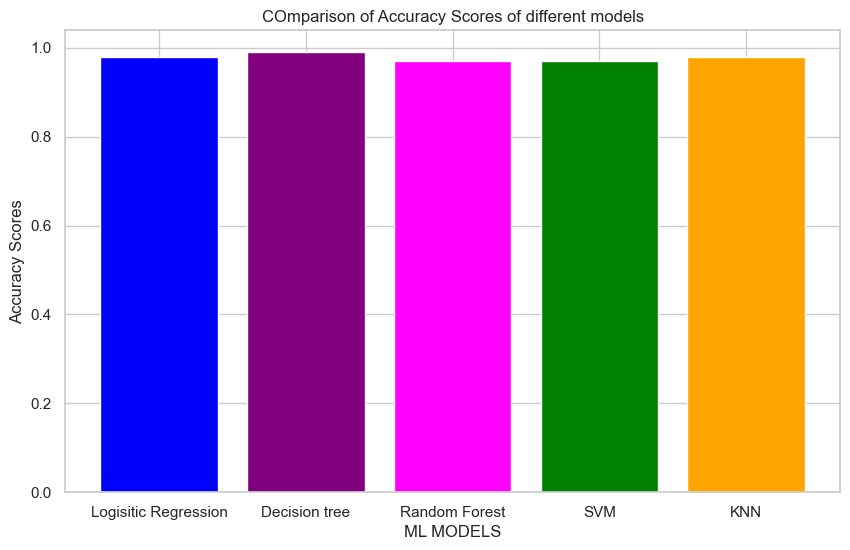

In [398]:
#Visualization
models = ['Logisitic Regression', 'Decision tree', 'Random Forest', 'SVM', 'KNN']
accuarcy_scores= [ 0.98,0.99,0.97, 0.97, 0.98]
colors = ['blue', 'purple', 'magenta', 'green','orange']
plt.figure(figsize=(10,6))
plt.bar(models, accuarcy_scores, color = colors)
plt.xlabel("ML MODELS")
plt.ylabel("Accuracy Scores")
plt.title("COmparison of Accuracy Scores of different models")

### Conclusion
1. Decision Tree:
    Highest accuracy (98%), Overall top performing model

##### Using RandomSearch CV to select best params

In [399]:
from sklearn.model_selection import RandomizedSearchCV

In [400]:
rf_params = {"max_depth": [5,8,15,20,None],
             "max_features": [5,6,7,"auto"],
             "min_samples_split": [2,8,15],
             "n_estimators": [100,200,500]}

In [401]:
randomcv_models = [("RF", RandomForestClassifier(), rf_params)]

In [402]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, 20, None],
   'max_features': [5, 6, 7, 'auto'],
   'min_samples_split': [2, 8, 15],
   'n_estimators': [100, 200, 500]})]

In [403]:
model_params ={}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator = model,
                      param_distributions=params,
                      n_iter = 20,
                      cv = 3,
                      verbose = 2, 
                      n_jobs = 1)
    random.fit(X_train, y_train)
    model_params[name] = random.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=500; total time=   2.3s
[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END max_depth=15, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_fea

c:\Users\KIIT\Desktop\FraudDetection\myProjectEnv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
18 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\KIIT\Desktop\FraudDetection\myProjectEnv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\KIIT\Desktop\FraudDetection\myProjectEnv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\KIIT\Desktop\FraudDetection\myProjectEnv\Lib\site-packages\sklearn\base.py", line 436, in _val

In [404]:
model_params

{'RF': {'n_estimators': 500,
  'min_samples_split': 2,
  'max_features': 7,
  'max_depth': None}}

In [405]:
rf_model_2 = RandomForestClassifier(n_estimators=100,
                                    min_samples_split=2,
                                    max_features=7,
                                    max_depth=None)
rf_model_2.fit(X_train, y_train)

RandomForestClassifier(max_features=7)

In [406]:
rf_y_pred2 = rf_model_2.predict(X_test)
print("RF Model Evaluation: ")
evaluate_model(y_test, rf_y_pred2)

RF Model Evaluation: 
Accuracy:  0.9966666666666667

Confusion Matrix
 [[ 322    5]
 [   0 1173]]

Precision :  0.9957555178268251

RECALL:  1.0

F1 Score:  0.9978732454274777
